## **Importing dataset**

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
df = yf.Ticker("^NSEI").history(period="5y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-26 00:00:00+05:30,11000.299805,11070.299805,10756.549805,11057.849609,684100,0.0,0.0
2019-08-27 00:00:00+05:30,11106.549805,11141.750000,11049.500000,11105.349609,685600,0.0,0.0
2019-08-28 00:00:00+05:30,11101.299805,11129.650391,10987.650391,11046.099609,550000,0.0,0.0
2019-08-29 00:00:00+05:30,10996.049805,11021.099609,10922.400391,10948.299805,649900,0.0,0.0
2019-08-30 00:00:00+05:30,10987.799805,11042.599609,10874.799805,11023.250000,628200,0.0,0.0


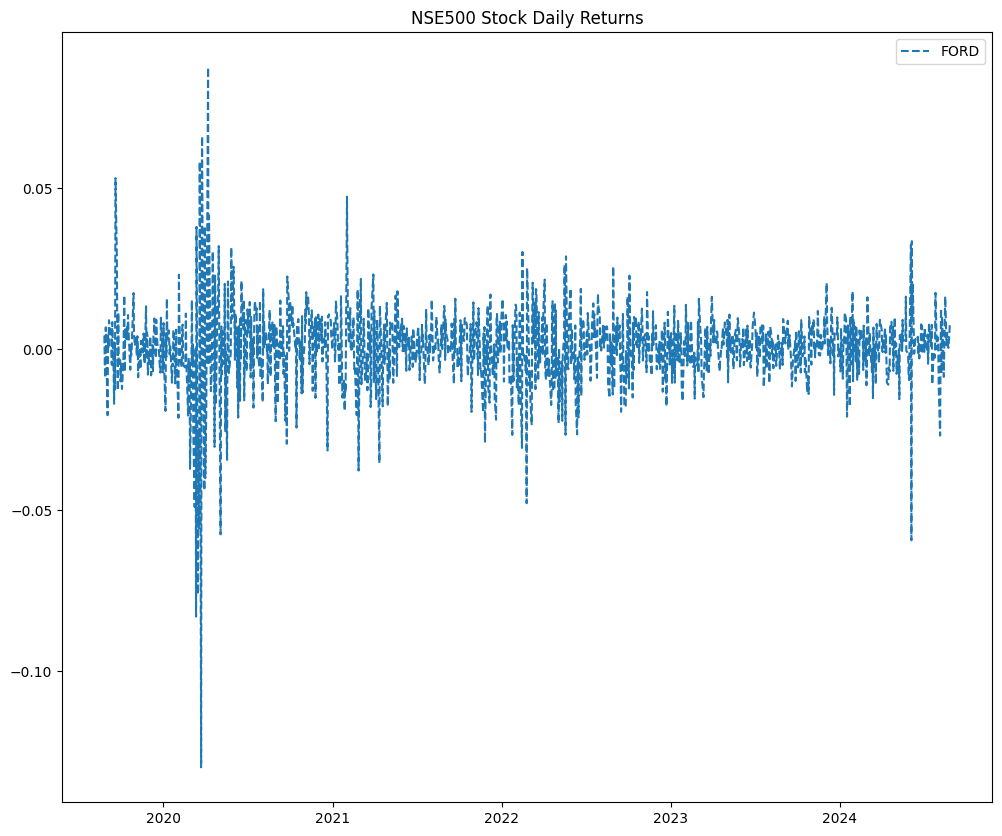

In [11]:
plt.figure(figsize=(12,10))
plt.plot(df['Close'].pct_change(), label='FORD', linestyle='--')
plt.title('NSE500 Stock Daily Returns')
plt.legend()